In [1]:
######### 20개 뉴스 그룹 데이터셋을 이용한 텍스트 분류 #########
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

news_data = fetch_20newsgroups(subset='all', random_state=156)

print(news_data.keys())

print('target 클래스의 값과 분포도\n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들\n', news_data.target_names, '\n')

#첫번째 기사 내용 확인
print(news_data.data[0])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
target 클래스의 값과 분포도
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'] 

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@maven

In [2]:
#subset = 'train' 으로 학습용 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출

train_news = fetch_20newsgroups(subset='train',
                                remove=('headers', 'footers', 'quotes'),
                                random_state=156)
X_train = train_news.data
y_train = train_news.target

print(type(X_train))

<class 'list'>


In [3]:
#subset = 'test' 로 테스트용 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출

test_news = fetch_20newsgroups(subset='test',
                               remove=('headers', 'footers', 'quotes'),
                               random_state=156)
X_test = test_news.data
y_test = test_news.target

print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


In [4]:
#카운트 기반으로 벡터화
from sklearn.feature_extraction.text import CountVectorizer

cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)

X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 Text의 CountVectorizer Shape:', X_train_cnt_vect.shape)

학습 데이터 Text의 CountVectorizer Shape: (11314, 101631)


In [6]:
#LogisticRegression을 이용하여 학습데이터에 관한 예측 평가 수행
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)

print('CountVectorizer LogisticRegression 예측 정확도 {0:.3f}'.format(accuracy_score(y_test, pred)))

CountVectorizer LogisticRegression 예측 정확도 0.607


C:\Users\student\anaconda3\envs\mypy\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
#Tf-Idf Vectorizer 기반 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)

X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)

print('TfidfVectorizer LogisticRegression 예측 정확도: {0:.3f}'.format(accuracy_score(y_test, pred)))

TfidfVectorizer LogisticRegression 예측 정확도: 0.674


In [8]:
#Pipeline을 이용해 GridSearchCV 실행
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
                     ('lr_clf', LogisticRegression(C=10))])
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)

print('Pipeline을 통한 LogisticRegression 예측 정확도: {0:.3f}'.format(accuracy_score(y_test, pred)))

C:\Users\student\anaconda3\envs\mypy\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline을 통한 LogisticRegression 예측 정확도: 0.701


In [ ]:
########## 하이퍼 파라미터 찾기 ###########
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))),
                     ('lr_clf', LogisticRegression())])

params = {'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
          'tfidf_vect__max_df': [100, 300, 700],
          'lr_clf__C': [1, 5, 10]}

grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3,
                            scoring='accuracy', verbose=1)
grid_cv_pipe.fit(X_train, y_train)

print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)

print('Pipeline을 통한 LogisticRegression 예측 정확도: {0:.3f}'.format(accuracy_score(y_test, pred)))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\student\anaconda3\envs\mypy\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\student\anaconda3\envs\mypy\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

In [5]:
########텍스트 전처리 1 : 문장 토큰화, 단어 토큰화 #############
from nltk import sent_tokenize
from nltk import word_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text_sample)
print(type(sentences), len(sentences ))
print(sentences )

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words ))
print(words )

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...


<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']
<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


[nltk_data]   Package punkt is already up-to-date!


In [6]:
########텍스트 전처리 2 : stopword 제거 (필터링)#############

nltk.download('stopwords')
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'


stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

def tokenize_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence) for sentence in sentences]

    return word_tokens

word_tokens = tokenize_text(text_sample)

for sentence in word_tokens :
    filtered_words=[]
    for word in sentence :
        word = word.lower()
        if word not in stopwords :
            filtered_words.append(word)
    all_tokens.append(filtered_words)

    
print(all_tokens)

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']
[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
########텍스트 전처리 3 : 어근 추출 #############
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))


from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('working' , 'v'), lemma.lemmatize('works', 'v'), lemma.lemmatize('worked', 'v'))

work work work


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


work work work


In [8]:
#######텍스트 전처리 4 : 수치 데이터 벡터화 ##################
#희소 행렬 COO 형식
import numpy as np

dense = np.array([[3,0,1], [0,2,0]])

from scipy import sparse
data = np.array([3, 1, 2])
row_pos = np.array([0,0,1])
col_pos = np.array([0, 2, 1])

sparse_coo=sparse.coo_matrix((data, (row_pos, col_pos)))
sparse_coo.toarray()


#희소 행렬 CSR 형식
dense2  = np.array([[0,0,1,0,0,5],
                    [1,4,0,3,2,5],
                    [0,6,0,3,0,0],
                    [2,0,0,0,0,0],
                    [0,0,0,7,0,8],
                    [1,0,0,0,0,0]])

data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])
row_pos = np.array([0, 0,1,1,1,1,1, 2, 2, 3, 4, 4, 1])
col_pos = np.array([2, 5, 0, 1,3,4,5, 1, 3, 0, 3, 5, 0])

sparse_csr=sparse.csr_matrix((data2, (row_pos, col_pos)))
sparse_csr.toarray()

array([[0, 0, 1, 0, 0, 5],
       [2, 4, 0, 3, 2, 5],
       [0, 6, 0, 3, 0, 0],
       [2, 0, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 8]], dtype=int32)

In [9]:
##############신경망 하이퍼파라미터 찾기 : GridSearchDV ####
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from keras.wrappers.scikit_learn import KerasClassifier

np.random.seed(0)

number_of_features = 100

features, target = make_classification(n_samples=10000, n_features = number_of_features, n_classes=2, n_informative=3, n_redundant=0, weights=[.5, .5], random_state = 0)

def create_network(optimizer='rmsprop') :
    network = Sequential();
    network.add(Dense(units=16, activation='relu', input_shape=(number_of_features,)))
    network.add(Dense(units=16, activation='relu'))
    network.add(Dense(units=1, activation="sigmoid"))
    network.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return network

{'batch_size': 5, 'epochs': 5, 'optimizer': 'rmsprop'}


In [ ]:
neural_network = KerasClassifier(build_fn=create_network, verbose=0)

epochs=[5, 10]
batchs =[5, 10, 100]
optimizers =['rmsprop', 'adam']

hyperparameters = dict(optimizer=optimizers, epochs=epochs, batch_size=batchs)

grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

grid_result = grid.fit(features, target)
print(grid_result.best_params_)

In [13]:
############CNN 실습##########################
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf


numpy.random.seed(0)
tf.set_random_seed(0)

# 데이터 로드
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 정답 label one-hot enconding
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [14]:
#모델 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [15]:
#모델 구축 컴파일
model.compile(loss='categorical_crossentropy',   optimizer='adam', metrics=['accuracy'])


#모델 실행 결과 model폴더에 파일로 저장
#학습 중단 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05496, saving model to ./model/01-0.0550.hdf5

Epoch 00002: val_loss improved from 0.05496 to 0.04196, saving model to ./model/02-0.0420.hdf5

Epoch 00003: val_loss improved from 0.04196 to 0.03608, saving model to ./model/03-0.0361.hdf5

Epoch 00004: val_loss did not improve from 0.03608

Epoch 00005: val_loss did not improve from 0.03608

Epoch 00006: val_loss improved from 0.03608 to 0.03187, saving model to ./model/06-0.0319.hdf5

Epoch 00007: val_loss did not improve from 0.03187

Epoch 00008: val_loss improved from 0.03187 to 0.03060, saving model to ./model/08-0.0306.hdf5

Epoch 00009: val_loss did not improve from 0.03060

Epoch 00010: val_loss improved from 0.03060 to 0.03004, saving model to ./model/10-0.0300.hdf5

Epoch 00011: val_loss did not improve from 0.03004

Epoch 00012: val_loss improved from 0.03004 to 0.02921, saving model to ./model/12-0.0292.hdf5

Epoch 00013: val_loss did not improve from 0.02921

Epoch 00014: val_lo

In [16]:
#정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 5s 529us/step

 Test Accuracy: 0.9925


No handles with labels found to put in legend.


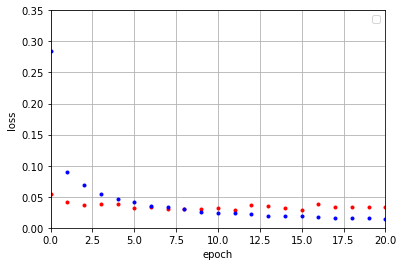

In [22]:
#학습셋 오차와 테스트셋 오차를 시각화
# 테스트 셋의 오차
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_loss, "o", c="blue", markersize=3)
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()